# Categorical data preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
titanic = sns.load_dataset("titanic")
# data overview
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Number of passengers by group

In [6]:
print(titanic.groupby('sex')['class'])
titanic.groupby('sex')['class'].count()
titanic.groupby('sex')['class'].value_counts()


sex     class 
female  Third     144
        First      94
        Second     76
male    Third     347
        First     122
        Second    108
Name: count, dtype: int64

In [ ]:
# Passengers by sex
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
# table for sex and class column of categorical variables
pd.crosstab(titanic.sex, titanic.pclass, margins=True)

pclass,1,2,3,All
sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [ ]:
# map() function to declare male and female as 0 and 1
titanic['sex_num']=titanic.sex.map({'male':0, 'female':1})
titanic.sex_num.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: sex_num, dtype: int64

In [7]:
# A categorical column into numeric value in a new column
titanic['embarked_num']=titanic.embarked.factorize()[0]
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


# **Converting Catagorical data into interger with replace function**

# **For Loop categorical to integer for all column**

In [15]:
for col in titanic.columns:
  if titanic[col].dtype == 'object':
    titanic[col] = pd.factorize(titanic[col])[0]
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True
5,0,3,1,NaN,0,0,8.4583,1,2,1,True,7,1,0,True
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True
7,0,3,1,2.0,3,1,21.0750,2,2,0,False,7,2,0,False
8,1,3,0,27.0,0,2,11.1333,2,2,2,False,7,2,1,False
9,1,2,0,14.0,1,0,30.0708,0,1,0,False,7,0,1,False


### scikit learn

#### **label encoder**

In [10]:
from sklearn.preprocessing import LabelEncoder
titanic=sns.load_dataset('titanic')
# checking data type
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
for col in titanic.describe(include = 'object').columns:
  titanic[col]= titanic[col].astype('category')


titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(7), float64(2), int64(4)
memory usage: 50.8 KB


**LabelEncoder**

In [12]:
encoder = LabelEncoder()
#categorical_features = train.columns.tolist()
for col in titanic.columns:
  if titanic[col].dtype == 'category':
    titanic[col] = encoder.fit_transform(titanic[col])

#for col in titanic.columns:
#  if titanic[col].dtype == 'object':
#    titanic[col] = encoder.fit_transform(titanic[col])


titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True
5,0,3,1,NaN,0,0,8.4583,1,2,1,True,7,1,0,True
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True
7,0,3,1,2.0,3,1,21.0750,2,2,0,False,7,2,0,False
8,1,3,0,27.0,0,2,11.1333,2,2,2,False,7,2,1,False
9,1,2,0,14.0,1,0,30.0708,0,1,0,False,7,0,1,False


####**Onehot encoder**

In [ ]:
#OnehotEncoder fits well with data those are not in hierarchy or order, e.g.; country name

**Ordinal Encoder**

**OrdinalEncoder is for 2D data with the shape(n_samples, n_features)**

In [16]:
from sklearn.preprocessing import OrdinalEncoder
titanic=sns.load_dataset('titanic')
encoder = OrdinalEncoder()
#categorical_features = train.columns.tolist()
#for col in titanic.columns:
#  if titanic[col].dtype == 'category':
#    titanic[col] = OrdinalEncoder.fit_transform(titanic[col])

for col in titanic.columns:
  if titanic[col].dtype == 'object':
    titanic[[col]] = encoder.fit_transform(titanic[[col]]) # [[]] to make 2D array




titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,1.0,33.0,0,0,7.8958,2.0,Third,1.0,True,NaN,2.0,0.0,True
882,0,3,0.0,22.0,0,0,10.5167,2.0,Third,2.0,False,NaN,2.0,0.0,True
883,0,2,1.0,28.0,0,0,10.5000,2.0,Second,1.0,True,NaN,2.0,0.0,True
884,0,3,1.0,25.0,0,0,7.0500,2.0,Third,1.0,True,NaN,2.0,0.0,True
885,0,3,0.0,39.0,0,5,29.1250,1.0,Third,2.0,False,NaN,1.0,0.0,False
886,0,2,1.0,27.0,0,0,13.0000,2.0,Second,1.0,True,NaN,2.0,0.0,True
887,1,1,0.0,19.0,0,0,30.0000,2.0,First,2.0,False,B,2.0,1.0,True
888,0,3,0.0,NaN,1,2,23.4500,2.0,Third,2.0,False,NaN,2.0,0.0,False
889,1,1,1.0,26.0,0,0,30.0000,0.0,First,1.0,True,C,0.0,1.0,True
890,0,3,1.0,32.0,0,0,7.7500,1.0,Third,1.0,True,NaN,1.0,0.0,True


# Survival Analysis

In [17]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6b13ae6434eadf5530978d19b8dba8048c306979ef5b51a71df1d7b408a9daf3
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [19]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_rossi, load_lung
import matplotlib.pyplot as plt


In [20]:
# Load data
lung = load_lung()
print(lung.head())


   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


In [23]:
# Separate by sex: 1=male, 2=female
male = lung[lung['sex'] == 1]
female = lung[lung['sex'] == 2]

In [24]:
# Initialize Kaplan-Meier fitters
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

In [25]:
# Fit data
kmf_male.fit(durations=male['time'], event_observed=male['status'], label='Male')
kmf_female.fit(durations=female['time'], event_observed=female['status'], label='Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

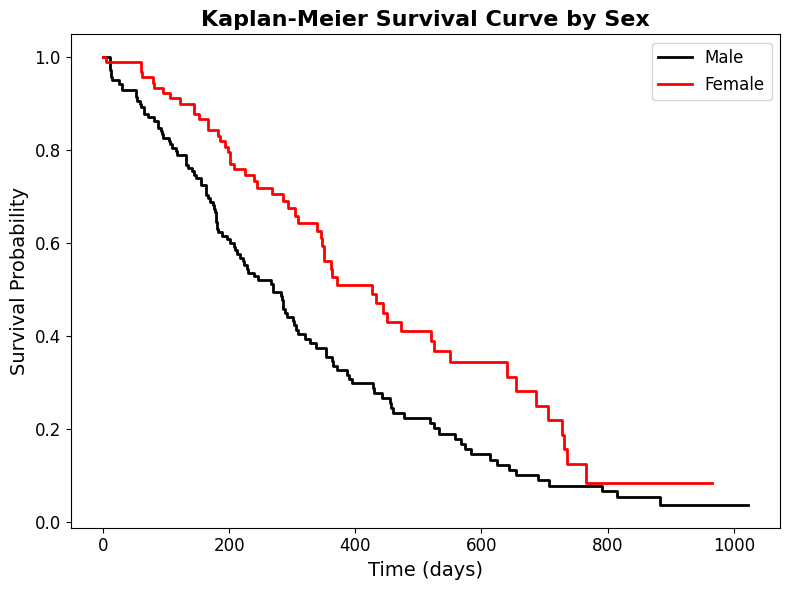

In [29]:
# Plotting
plt.figure(figsize=(8,6))

# Male curve
kmf_male.plot_survival_function(
    ci_show=False,
    color='black',   # blue
    linewidth=2,
    linestyle='-'
)

# Female curve
kmf_female.plot_survival_function(
    ci_show=False,
    color='red',   # orange
    linewidth=2,
    linestyle='-'
)

# Customize plot
plt.title("Kaplan-Meier Survival Curve by Sex", fontsize=16, weight='bold')
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("Survival Probability", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()
